# Revisiondu test 601!!! 

## "NLP Classification Analysis."

#### Answer the following questions by providing Python code:
#### Objectives:
- Pre-processing of text data.
- Create a TF IDF representation.
- Build network and train it untill validation loss reduces (EarlyStopping)
- Carry out the predictive analysis using the Naive Bayes algorithm. 
- Carry out the predictive analysis using SVM. 

In [1]:
import re
# Importing required libraries
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
from keras.layers.core import Reshape, Flatten
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam    



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yanis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\yanis\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yanis\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yanis\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type

## Carry out the data pre-processing
1). Read in data


In [2]:
 # defining function to clean text and retrive closs-validation datasets
def cleantxt(txt):
    """
    Cleans the string passed. Cleaning Includes-
    1. remove special characters/symbols
    2. convert text to lower-case
    3. retain only alphabets
    4. remove words less than 3 characters
    5. remove stop-words
    """  
    # collecting english stop words from nltk-library
    stpw = stopwords.words('english')
    
    # Adding custom stop-words
    stpw.extend(['www','http','utc'])
    stpw = set(stpw)
    
    # using regex to clean the text
    txt = re.sub(r"\n", " ", txt)
    txt = re.sub("[\<\[].*?[\>\]]", " ", txt)
    txt = txt.lower()
    txt = re.sub(r"[^a-z ]", " ", txt)
    txt = re.sub(r"\b\w{1,3}\b", " ",txt)
    txt = " ".join([x for x in txt.split() if x not in stpw])
    return txt

def load_data():
    """
    Loads data and returns train, val, and test splits
    """
    # Load the train dataset
    df = pd.read_csv("data.csv")
    
    # Clean the text
    df['comment_text'] = df.comment_text.apply(lambda x : cleantxt(x))
    
    # separate explanatory and dependent variables
    X = df.iloc[:,1]
    y = df.iloc[:,2:]

    # split for cross-validation (train-60%, validation 20% and test 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

    return X_train, X_val, X_test, y_train, y_val, y_test
    
X_train, X_val, X_test, y_train, y_val, y_test = load_data() 

In [3]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([553196,  21256], dtype=int64))

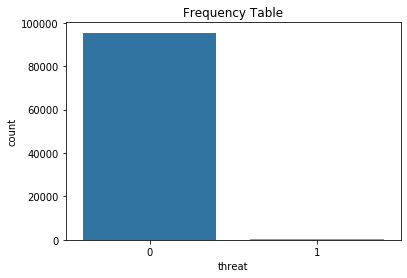

In [4]:
# Visualize the response variable, according to one of the ratget values
sns.countplot(y_train.iloc[:,3]).set_title("Frequency Table") # replace 4 by 3 the 5
plt.show()

2). Create a TF IDF representation.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html



In [5]:
vect = TfidfVectorizer(decode_error='ignore',stop_words='english')

train_tfidf = vect.fit_transform(X_train)
val_tfidf = vect.transform(X_val)
test_tfidf = vect.transform(X_test)

## 2)-Build network and train it untill validation loss reduces (EarlyStopping)


In [6]:
ip_dim = train_tfidf.shape[1]

model = Sequential() #define a sequential model
model.add(Dense(64, input_dim=ip_dim, activation='relu'))  #Define a first layer with 64 units and relu as an activation function
model.add(Dense(64, activation='relu')) #Define a second layer with 64 units and relu as an activation function
model.add(Dense(6, activation='sigmoid')) # Define the input layer with 6units and sigmoid activation function

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
#Compiling Model using optimizer with lr=1e-3
opt = Adam(lr=1e-3)

#model.compile by using loss='binary_crossentropy' and Adam optimizer
model.compile(loss='binary_crossentropy',optimizer=opt)

# Fitting Model to the data
callbacks = [EarlyStopping(monitor='val_loss')]  #define the earlu stopping use [EarlyStopping(monitor='val_loss')]   
hist_adam = model.fit(train_tfidf, np.asarray(y_train), batch_size=1000, epochs=3, verbose=2, validation_data=(val_tfidf, np.asarray(y_val)),
         callbacks=callbacks)  # starts trainingg

Instructions for updating:
Use tf.cast instead.
Train on 95742 samples, validate on 31915 samples
Epoch 1/3
 - 260s - loss: 0.3063 - val_loss: 0.0986
Epoch 2/3
 - 258s - loss: 0.0756 - val_loss: 0.0653
Epoch 3/3
 - 306s - loss: 0.0509 - val_loss: 0.0618


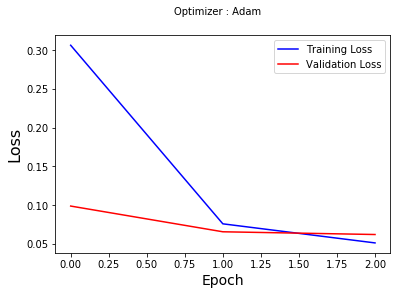

In [8]:
#plot the following !!! 
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.plot(hist_adam.history['loss'], color='b', label='Training Loss')
plt.plot(hist_adam.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

## 3)Apply the Naive Bayes algorithm. Calculate the accuracy.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(decode_error='ignore',stop_words='english')
train_dtm=vect.fit_transform(X_train)
train_dtm

<95742x118883 sparse matrix of type '<class 'numpy.int64'>'
	with 2106901 stored elements in Compressed Sparse Row format>

In [10]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.01)
nb.fit(train_dtm, y_train.severe_toxic)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [13]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True) #apply MultinomialNB
nb.fit(train_dtm, y_train.severe_toxic)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [14]:
y_pred_nb = nb.predict(train_dtm)
from sklearn import metrics
nbAcc=metrics.accuracy_score(y_train.severe_toxic, y_pred_nb)
nbAcc

0.9897014894194816